## Integrantes:
- Luis Francisco Rodriguez Acevedo

## Definir:
- Geometria planteada:
  - Vertices
  - Bordes
- Funcion de traslacion 3D
- Funcion de proyeccion tipo Pinhole
- Trasladar cubo a
  - x = 100, y = 200, z = 50
- Trasladar proyeccion al centro

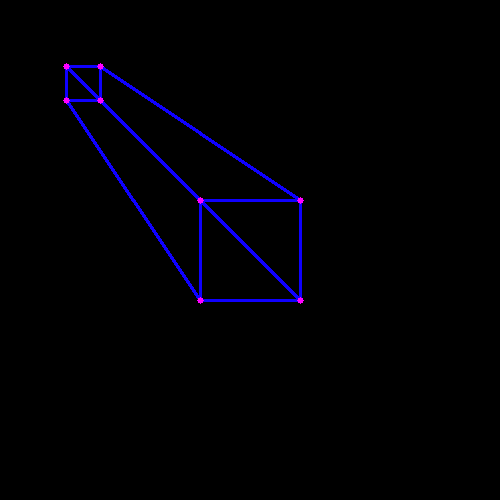

In [1]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow

# Funciones
def draw(vertices, edges, im):
    """Dibuja objeto definido por vertices y bordes"""
    # Normalizar coordenadas homogeneas
    v_h = np.array([v[:-2] / v[-1] for v in vertices])
    for e in edges:
        cv.line(im, tuple(v_h[e[0]].astype(int)), tuple(v_h[e[1]].astype(int)), (255, 0, 15), 2)
    for v in v_h:
        cv.circle(im, tuple(v.astype(int)), 3, (255, 0, 255), -1)

### ---------- DEFINIR FUNCIONES ---------- ###

def translate3d(vertex, dx, dy, dz):
    matriz = np.array([[1, 0, 0, dx], [0, 1, 0, dy], [0, 0, 1, dz], [0, 0, 0, 1]])
    Transformacion1 = matriz @ vertex.T # Transpuesto
    return Transformacion1.T

def project2D(vertex, f):
    matriz1 = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 1 / f, 0]])
    Transformacion2 = matriz1 @ vertex.T # Transpuesto
    return Transformacion2.T

### ---------- DEFINIR GEOMETRÍA ---------- ###

v = np.array([[0, 100, 100, 1], [0, 100, 0, 1], [100, 100, 0, 1], [100, 0, 0, 1], [100, 0, 100, 1], [0, 0, 100, 1], [0, 0, 0, 1], [100, 100, 100, 1]])
edges = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 0), (5, 6), (1, 6), (6, 3), (7, 4), (0, 7), (7, 2)]

### ---------- TRASLADAR CUBO A POSICION INDICADA ---------- ###

# Parametros cámara
f = 50 # Distancia focal
# Tamaño imagen
w = 500
h = 500
t = 200

### ---------- PROYECTAR VÉRTICES ---------- ###

# Proyectar 3D -> 2D
vp1 = translate3d(v, 100, 200, 50) # movimiento
vp15 = translate3d(v, t, t, 50)
vp2 = project2D(vp15, f)

### ---------- TRASLADAR PROYECCIÓN A CENTRO DE IMAGEN ---------- ###

# Dibujar y mostrar
im = np.zeros((h, w, 3), np.uint8)
draw(vp2, edges, im)
cv2_imshow(im)
